## <center>**Рубежный контроль №2**</center>

### Щепетов Дмитрий ИУ5-62Б

Вариант 18 (HRDataset)

| Метод 1  | Метод 2   |
| ------- | -------- |
| Метод опорных векторов   |   Случайный лес  |

In [69]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Загрузим данные в data и определим вид изначальных данных

In [70]:
data=pd.read_csv("HRDataset_v14.csv")

In [71]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [73]:
data.shape

(311, 36)

In [74]:
data.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

Построим Корреляционную матрицу для определения взаимосвязей между признаками

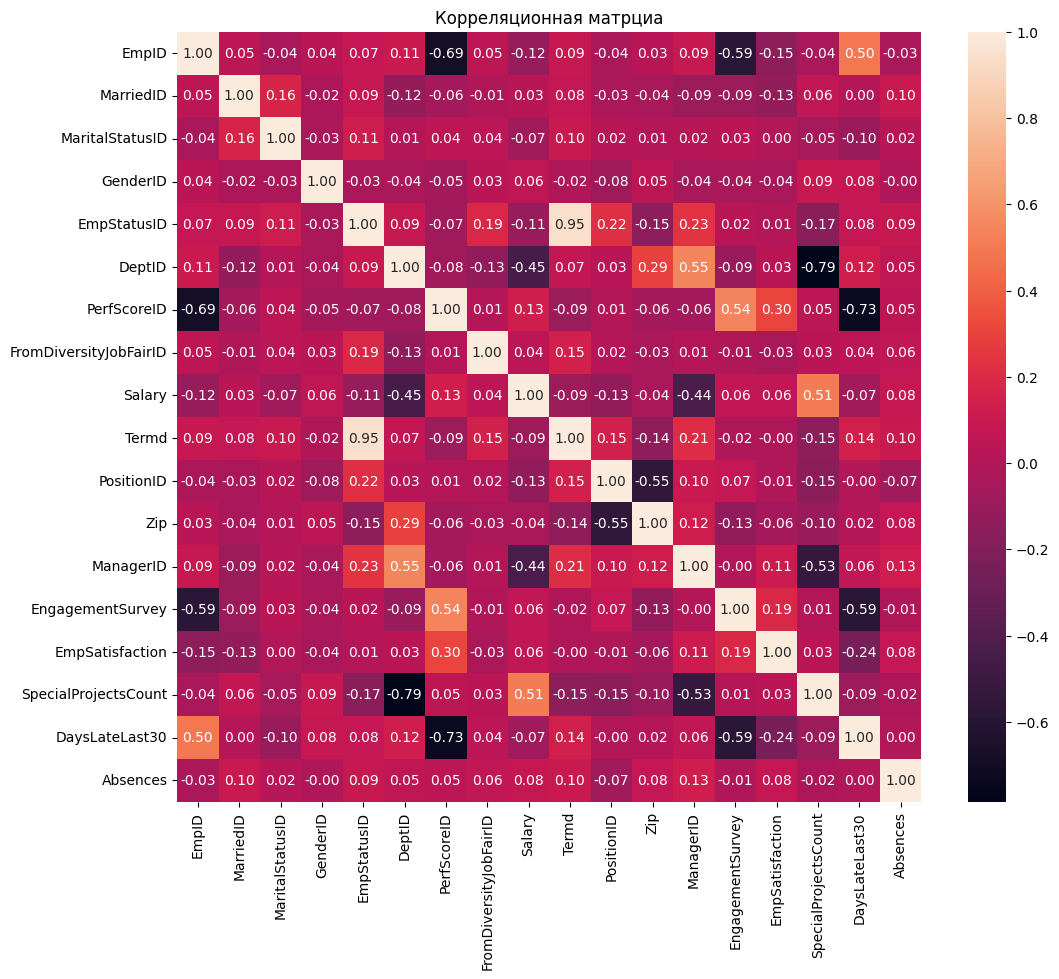

In [75]:
num_data = data[data.select_dtypes(include=['int64', 'float64']).columns]
correlation_matrix = num_data.corr()
# Визуализация тепловой карты корреляционной матрицы
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Корреляционная матрциа')
plt.show()

Буду решать задачу классификации для признака `EmploymentStatus` (предсказывать статус занятости на основе имеющихся признаков).

Данный признак имеет 3 значения

In [76]:
print(data["EmploymentStatus"].unique())
unique_values_count = data['EmploymentStatus'].nunique()
print(f'Количество уникальных значений в признаке EmploymentStatus: {unique_values_count}')

['Active' 'Voluntarily Terminated' 'Terminated for Cause']
Количество уникальных значений в признаке EmploymentStatus: 3


### Проверим датасет на наличие пропусков

In [77]:
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Видно, что пропуски имеет только 1 признак `DateofTermination`. Сделаем замену: создадим признак `Terminated`, который принимает значения 0, если сотрудник уволен, или 1, если нет, а признак `DateofTermination` удалим.

In [78]:
# Создание нового признака Terminated
data['Terminated'] = data['DateofTermination'].notnull().astype(int)
print(data[['DateofTermination', 'Terminated']])


    DateofTermination  Terminated
0                 NaN           0
1           6/16/2016           1
2           9/24/2012           1
3                 NaN           0
4            9/6/2016           1
..                ...         ...
306               NaN           0
307         9/29/2015           1
308               NaN           0
309               NaN           0
310               NaN           0

[311 rows x 2 columns]


In [79]:
data = data.drop(columns=["DateofTermination"])

Также удалим признаки, которые никак не влияют на признак `EmploymentStatus` и содержат тип, отличающийся от int и float

In [80]:
data = data.drop(columns=["Employee_Name", "EmpID", "DateofHire", "Zip", "DOB", "ManagerID", "ManagerName", "LastPerformanceReview_Date"])

Закодируем все категориальные признаки в числовой формат с помощью Label Encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Применяем LabelEncoder к каждому признаку с типом данных "object"
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

print(data.head())

   MarriedID  MaritalStatusID  GenderID  EmpStatusID  DeptID  PerfScoreID  \
0          0                0         1            1       5            4   
1          1                1         1            5       3            3   
2          1                1         0            5       5            3   
3          1                1         0            1       5            3   
4          0                2         0            5       5            3   

   FromDiversityJobFairID  Salary  Termd  PositionID  ...  EmploymentStatus  \
0                       0   62506      0          19  ...                 0   
1                       0  104437      1          27  ...                 2   
2                       0   64955      1          20  ...                 2   
3                       0   64991      0          19  ...                 0   
4                       0   50825      1          19  ...                 2   

   Department  RecruitmentSource  PerformanceScore  Engagement

### Разбиение датасета на тестовую и тренировочную выборки


In [82]:
X = data.drop(columns=['EmploymentStatus'])
y = data['EmploymentStatus']

# Разделение данных на обучающую и тестовую выборки (например, 80% обучающих данных и 20% тестовых данных)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающей и тестовой выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (248, 27)
Размер тестовой выборки: (63, 27)


In [83]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Метод опорных векторов

In [84]:
# Создание экземпляра классификатора SVM
svm_model = SVC(kernel='linear', random_state=42)  # Линейное ядро
svm_model.fit(X_train, y_train)

# Оценка качества модели дерева решений
y_pred_svm = svm_model.predict(X_test)
print("Метод опорных векторов:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, average='weighted', zero_division=1))
print("Recall:", recall_score(y_test, y_pred_svm, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted', zero_division=1))

Метод опорных векторов:
Accuracy: 0.8412698412698413
Precision: 0.8723934018051666
Recall: 0.8412698412698413
F1-score: 0.8086266390614216


#### Метод Случайный лес

In [85]:
# Модель случайного леса
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Оценка качества модели случайного леса
y_pred_rf = random_forest.predict(X_test)
print("\nМодель случайного леса:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_rf, average='weighted'))


Модель случайного леса:
Accuracy: 0.9841269841269841
Precision: 0.9849624060150376
Recall: 0.9841269841269841
F1-score: 0.9832076974934119


Для оценки я решил использовать следующие метрики качества: Accuracy, Precision, Recall, F1-score.
Accuracy: Общая оценка, насколько часто модель правильно предсказывает.

Precision: Отражает, как много из предсказанных положительных результатов действительно положительные.

Recall: Показывает, насколько успешно модель находит все положительные случаи.

F1-score: Помогает оценить сбалансированность модели между точностью и полнотой.

Эти метрики в совокупности предоставляют полное представление о качестве модели и ее способности правильно классифицировать данные в различных аспектах, таких как точность, полнота и сбалансированность.

Модель случайного леса: Показывает высокие показатели всех метрик качества, что свидетельствует о хорошей способности модели обобщать данные и делать точные прогнозы.

Метод опорных векторов (SVM) показывает неплохие результаты по метрике Accuracy, однако остальные метрики немного ниже, чем у модели случайного леса.

По итогу **модель случайного леса** оказалась более эффективной в данной задаче классификации по сравнению с *методом опорных векторов* с линейным ядром.